In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import gsw as sw
import scipy as sc

from netCDF4 import Dataset

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

In [2]:
# import cruise data

in_file = '../data/data_CHL.csv'
chl_data = pd.read_csv(in_file, sep = ',').dropna(axis=0, subset=['depth (m)'])

# # chl.loc[chl['depth (m)']>100, 'depth (m)'] = 100
# chl = chl[chl['depth (m)']<70]

# in_file = '../data/KuroAlldata.csv'
# data = pd.read_csv(in_file, sep = ',').dropna(axis=0, subset=['depth (m)'])

# data['theta'] = sw.conversions.pt_from_t(data['S'], data['T(C)'], data['depth (m)'])

# data['transect'] = 0
# data.loc[(data['station']<9),'transect'] = 'A'
# data.loc[((data['station']>8) & (data['station']<17)),'transect'] = 'B'
# data.loc[((data['station']>16) & (data['station']<26)),'transect'] = 'C'
# data.loc[((data['station']>25) & (data['station']<34)),'transect'] = 'D'
# data.loc[(data['station']>33),'transect'] = 'E'

# data = data[data['station']!= 41]
int_chl = chl_data.groupby('station').agg({'lat': np.mean, 'lon':np.mean, u'CHL':np.sum})

ctd = sio.loadmat('../data/NT0918CTD.mat')
chl = pd.DataFrame()
tmp = np.nansum(ctd['chla'][1:100, :], axis = 0)
tmp = tmp[tmp>0]
chl['chl'] = tmp[0:40]
chl['station'] = np.arange(1, 41, 1)
chl.set_index('station', inplace = True)

int_chl['chl'] = chl['chl']

int_chl.to_csv('../data/int_CHL.csv', sep = ',')

In [3]:
# import MDT data
infile = '../../kuroshio_chapter/data/sla/dt_global_allsat_msla_h_20091020_20140106.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['sla'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

mdt[mdt<-3] = np.nan

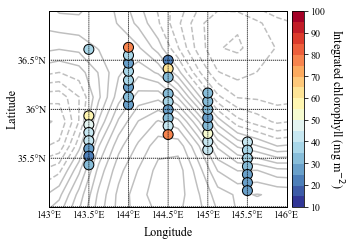

In [6]:
fig1 = plt.figure(figsize=(5., 5.), dpi = 300)

palette = plt.get_cmap('RdYlBu_r', 18)

ax1 = fig1.add_subplot(111)
m = Basemap(projection='merc',llcrnrlat=35.,urcrnrlat=37.,\
            llcrnrlon=143.,urcrnrlon=146.,lat_ts=0,resolution='c', ax = ax1)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
m.drawparallels(np.arange(30,50,0.5),labels=[1,0,0,0])
m.drawmeridians(np.arange(138,153,0.5),labels=[1,1,0,1])

xii, yii = m(lon_mdt, lat_mdt)
m.contour(xii,yii,mdt,levels = np.arange(-2, 2, 0.05), colors = 'grey', lw = 5, zorder = 1, alpha = 0.5)

xi, yi = m(int_chl['lon'].values, int_chl['lat'].values)
hh = m.scatter(xi, yi, s = 100, c = int_chl['chl'].values, vmin = 10, vmax = 100, cmap = palette, marker = 'o', edgecolors = 'k')

cbh = m.colorbar(hh)
cbh.set_label('Integrated chlorophyll (mg m$^{-2}$)',  fontsize=12, rotation = 270, labelpad = 20)

ax1.tick_params(axis='both', which='major',  labelsize=12)
ax1.tick_params(axis='both', which='minor',  labelsize=12)
ax1.set_ylabel('Latitude', labelpad = 30,  fontsize=12)
ax1.set_xlabel('Longitude', labelpad = 20,  fontsize=12)

fig1.savefig('../figures/int_chl_100m.png', dpi = 300, bbox_inches='tight')

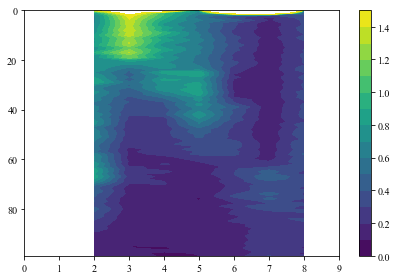

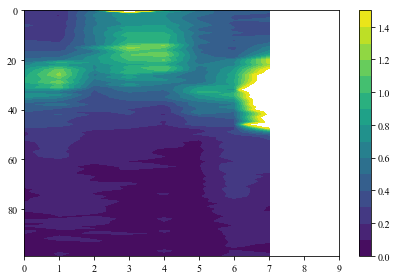

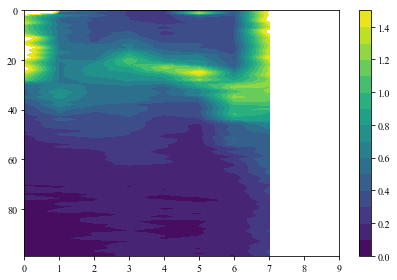

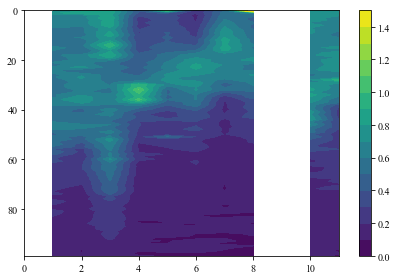

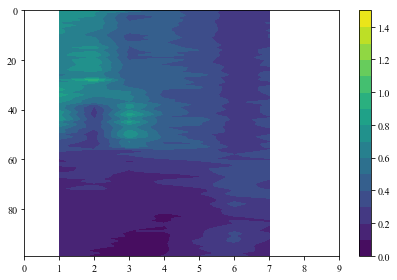

In [7]:
plt.contourf(ctd['chla'][0:100,0:10], levels = np.arange(0, 1.6, 0.1))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

plt.contourf(ctd['chla'][0:100,10:20], levels = np.arange(0, 1.6, 0.1))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

plt.contourf(ctd['chla'][0:100,20:30], levels = np.arange(0, 1.6, 0.1))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

plt.contourf(ctd['chla'][0:100,28:40], levels = np.arange(0, 1.6, 0.1))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

plt.contourf(ctd['chla'][0:100,37:47], levels = np.arange(0, 1.6, 0.1))
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()